<a href="https://colab.research.google.com/github/silvinadelgadotridon/Python/blob/main/Rosa_de_los_vientos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.cm as cm


!pip install windrose openpyxl
from windrose import WindroseAxes



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/




---


###Importo librerías y creo mi data frame a partir de una tabla de excel






In [4]:
df = pd.read_excel('/content/rosa de los vientos.xlsx')
df


,ID,DIA,MES,AÑO,HORA,DIRECCION,INTENSIDAD
0,876450,1,1,2021,0,110,9
1,876450,1,1,2021,1,160,6
2,876450,1,1,2021,2,160,7
3,876450,1,1,2021,3,180,7
4,876450,1,1,2021,4,250,6
...,...,...,...,...,...,...,...
8713,876450,31,12,2021,19,340,13
8714,876450,31,12,2021,20,360,11
8715,876450,31,12,2021,21,360,7
8716,876450,31,12,2021,22,20,15




---
###Agrego nuevas columnas llamadas  Fecha_inicio y Fecha_fin con formato fecha y las completo con los datos de mi tabla (columnas dia, mes y año)


In [7]:
df['Fecha_inicio'] = pd.to_datetime(df['MES'].astype(str)+ '-' + df['DIA'].astype(str) + '-' + df['AÑO'].astype(str))
df['Fecha_fin'] = pd.to_datetime(df['MES'].astype(str)+ '-' + df['DIA'].astype(str) + '-' + df['AÑO'].astype(str))
df


,ID,DIA,MES,AÑO,HORA,DIRECCION,INTENSIDAD,Fecha_inicio,Fecha_fin
0,876450,1,1,2021,0,110,9,2021-01-01,2021-01-01
1,876450,1,1,2021,1,160,6,2021-01-01,2021-01-01
2,876450,1,1,2021,2,160,7,2021-01-01,2021-01-01
3,876450,1,1,2021,3,180,7,2021-01-01,2021-01-01
4,876450,1,1,2021,4,250,6,2021-01-01,2021-01-01
...,...,...,...,...,...,...,...,...,...
8713,876450,31,12,2021,19,340,13,2021-12-31,2021-12-31
8714,876450,31,12,2021,20,360,11,2021-12-31,2021-12-31
8715,876450,31,12,2021,21,360,7,2021-12-31,2021-12-31
8716,876450,31,12,2021,22,20,15,2021-12-31,2021-12-31




---


###1.   Armo la rosa de los vientos a partir de la clase importada WindroseAxes

###2.    Defino el tipo de roseta que quiero hacer (de contorno), de qué depende, los rangos, colores y grosor d elas líneas

###3.   Defino cada cuanto voy a tener las isolíneas y sus etiquetas
###4.   Hago la leyenda




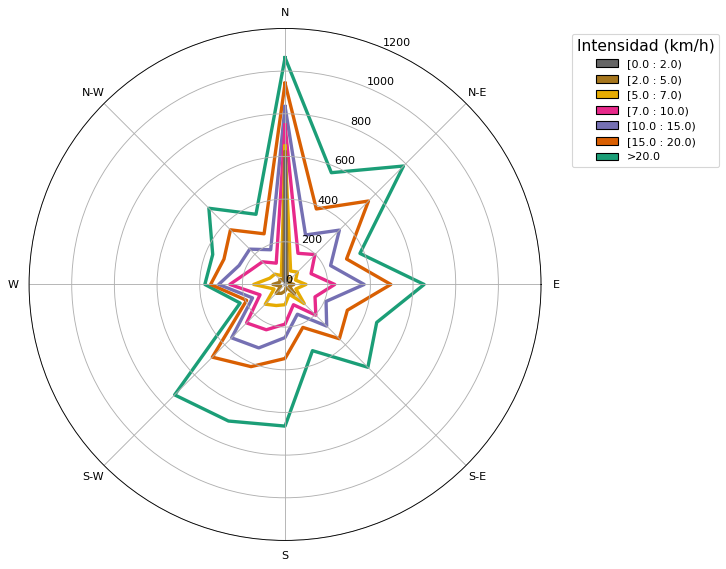

In [8]:
ax = WindroseAxes.from_ax()
ax.contour(df.DIRECCION, df.INTENSIDAD, bins=[0,2,5,7,10,15,20],cmap =cm.Dark2_r , lw =3)
ax.set_yticks(np.arange(0, 1300, step=200))
ax.set_yticklabels(np.arange(0, 1300, step=200))
plt.legend(title= 'Intensidad (km/h)',title_fontsize='14',bbox_to_anchor=(1.05, 1.0), loc='upper left')


---


### 1.   Defino las variables fecha_inicio1 y fecha_fin1 y les asigno valores
### 2.   Luego, creo un nuevo data frame, que es el resultado de las condiciones impuestas a los datos de df





In [ ]:
fecha_inicio1 = pd.to_datetime('2021-01-01')
fecha_fin1 = pd.to_datetime('2021-05-09')

df_recortado1 = df[(df['Fecha_inicio'] >= fecha_inicio1) &(df['Fecha_fin'] <= fecha_fin1)]
df_recortado1


,ID,DIA,MES,AÑO,HORA,DIRECCION,INTENSIDAD,Fecha_inicio,Fecha_fin
0,876450,1,1,2021,0,110,9,2021-01-01,2021-01-01
1,876450,1,1,2021,1,160,6,2021-01-01,2021-01-01
2,876450,1,1,2021,2,160,7,2021-01-01,2021-01-01
3,876450,1,1,2021,3,180,7,2021-01-01,2021-01-01
4,876450,1,1,2021,4,250,6,2021-01-01,2021-01-01
...,...,...,...,...,...,...,...,...,...
3059,876450,9,5,2021,19,290,6,2021-05-09,2021-05-09
3060,876450,9,5,2021,20,200,4,2021-05-09,2021-05-09
3061,876450,9,5,2021,21,180,6,2021-05-09,2021-05-09
3062,876450,9,5,2021,22,200,7,2021-05-09,2021-05-09


[Text(0, 0, '0'),
 Text(0, 100, '100'),
 Text(0, 200, '200'),
 Text(0, 300, '300'),
 Text(0, 400, '400')]

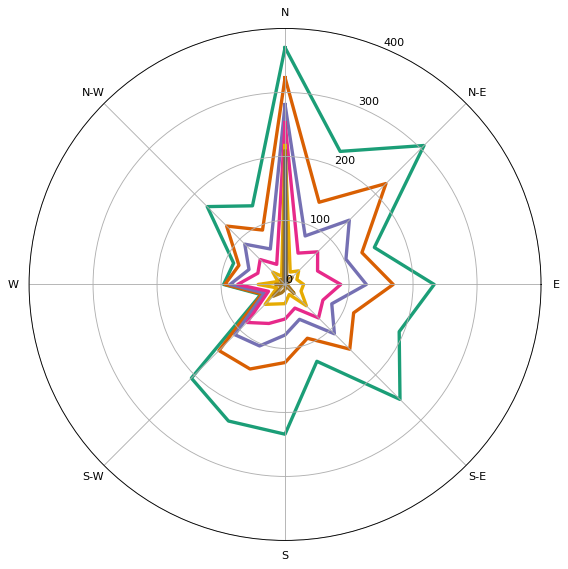

In [ ]:
ax = WindroseAxes.from_ax()
ax.contour(df_recortado1.DIRECCION, df_recortado1.INTENSIDAD, bins=[0,2,5,7,10,15,20],cmap =cm.Dark2_r , lw =3)
ax.set_yticks(np.arange(0, 500, step=100))
ax.set_yticklabels(np.arange(0, 500, step=100))
#plt.legend(title= 'Intensidad (km/h)',title_fontsize='14',bbox_to_anchor=(1.05, 1.0), loc='upper left')

In [ ]:
fecha_inicio2 = pd.to_datetime('2021-05-12')
fecha_fin2 = pd.to_datetime('2021-07-13')

df_recortado2 = df[(df['Fecha_inicio'] >= fecha_inicio2) &(df['Fecha_fin'] <= fecha_fin2)]
df_recortado2


,ID,DIA,MES,AÑO,HORA,DIRECCION,INTENSIDAD,Fecha_inicio,Fecha_fin
3112,876450,12,5,2021,0,270,6,2021-05-12,2021-05-12
3113,876450,12,5,2021,1,360,0,2021-05-12,2021-05-12
3114,876450,12,5,2021,2,270,6,2021-05-12,2021-05-12
3115,876450,12,5,2021,3,270,9,2021-05-12,2021-05-12
3116,876450,12,5,2021,4,270,6,2021-05-12,2021-05-12
...,...,...,...,...,...,...,...,...,...
4614,876450,13,7,2021,19,160,11,2021-07-13,2021-07-13
4615,876450,13,7,2021,20,140,6,2021-07-13,2021-07-13
4616,876450,13,7,2021,21,110,7,2021-07-13,2021-07-13
4617,876450,13,7,2021,22,110,9,2021-07-13,2021-07-13


[Text(0, 0, '0'),
 Text(0, 50, '50'),
 Text(0, 100, '100'),
 Text(0, 150, '150'),
 Text(0, 200, '200'),
 Text(0, 250, '250')]

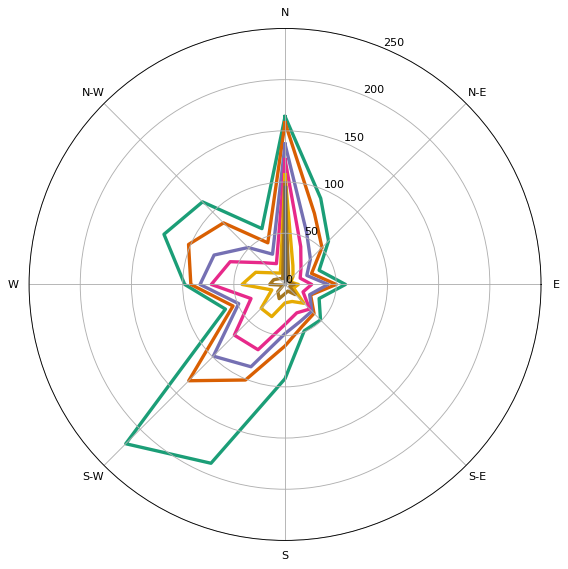

In [ ]:
ax = WindroseAxes.from_ax()
ax.contour(df_recortado2.DIRECCION, df_recortado2.INTENSIDAD, bins=[0,2,5,7,10,15,20],cmap =cm.Dark2_r , lw =3)
ax.set_yticks(np.arange(0, 300, step=50))
ax.set_yticklabels(np.arange(0, 300, step=50))
#plt.legend(title= 'Intensidad (km/h)',title_fontsize='14',bbox_to_anchor=(1.05, 1.0), loc='upper left')

In [ ]:
fecha_inicio3 = pd.to_datetime('2021-07-17')
fecha_fin3 = pd.to_datetime('2021-10-07')

df_recortado3 = df[(df['Fecha_inicio'] >= fecha_inicio3) &(df['Fecha_fin'] <= fecha_fin3)]
df_recortado3

,ID,DIA,MES,AÑO,HORA,DIRECCION,INTENSIDAD,Fecha_inicio,Fecha_fin
4691,876450,17,7,2021,0,230,22,2021-07-17,2021-07-17
4692,876450,17,7,2021,1,230,26,2021-07-17,2021-07-17
4693,876450,17,7,2021,2,230,24,2021-07-17,2021-07-17
4694,876450,17,7,2021,3,230,15,2021-07-17,2021-07-17
4695,876450,17,7,2021,4,230,13,2021-07-17,2021-07-17
...,...,...,...,...,...,...,...,...,...
6676,876450,7,10,2021,19,360,9,2021-10-07,2021-10-07
6677,876450,7,10,2021,20,360,7,2021-10-07,2021-10-07
6678,876450,7,10,2021,21,320,6,2021-10-07,2021-10-07
6679,876450,7,10,2021,22,200,6,2021-10-07,2021-10-07


[Text(0, 0, '0'),
 Text(0, 100, '100'),
 Text(0, 200, '200'),
 Text(0, 300, '300')]

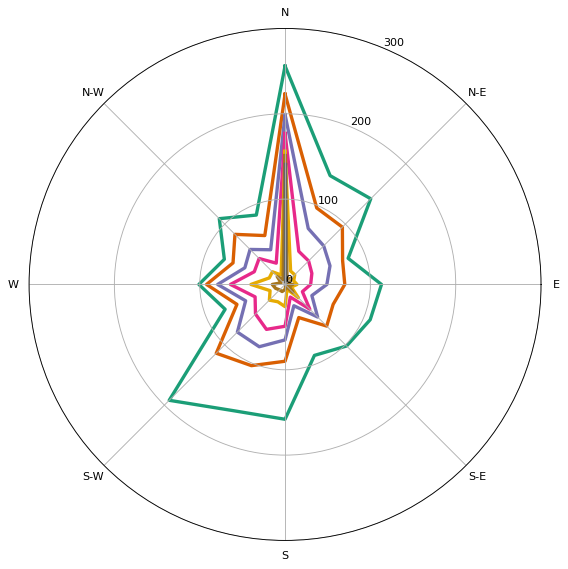

In [ ]:
ax = WindroseAxes.from_ax()
ax.contour(df_recortado3.DIRECCION, df_recortado3.INTENSIDAD, bins=[0,2,5,7,10,15,20],cmap =cm.Dark2_r , lw =3)
ax.set_yticks(np.arange(0, 400, step=100))
ax.set_yticklabels(np.arange(0, 400, step=100))
#plt.legend(title= 'Intensidad (km/h)',title_fontsize='14',bbox_to_anchor=(1.05, 1.0), loc='upper left')

In [ ]:
fecha_inicio4 = pd.to_datetime('2021-10-09')
fecha_fin4 = pd.to_datetime('2021-12-21')

df_recortado4 = df[(df['Fecha_inicio'] >= fecha_inicio4) &(df['Fecha_fin'] <= fecha_fin4)]
df_recortado4

,ID,DIA,MES,AÑO,HORA,DIRECCION,INTENSIDAD,Fecha_inicio,Fecha_fin
6705,876450,9,10,2021,0,20,4,2021-10-09,2021-10-09
6706,876450,9,10,2021,1,140,6,2021-10-09,2021-10-09
6707,876450,9,10,2021,2,110,6,2021-10-09,2021-10-09
6708,876450,9,10,2021,3,140,4,2021-10-09,2021-10-09
6709,876450,9,10,2021,4,360,0,2021-10-09,2021-10-09
...,...,...,...,...,...,...,...,...,...
8473,876450,20,12,2021,19,90,30,2021-12-20,2021-12-20
8474,876450,20,12,2021,20,90,28,2021-12-20,2021-12-20
8475,876450,20,12,2021,21,90,30,2021-12-20,2021-12-20
8476,876450,20,12,2021,22,90,24,2021-12-20,2021-12-20


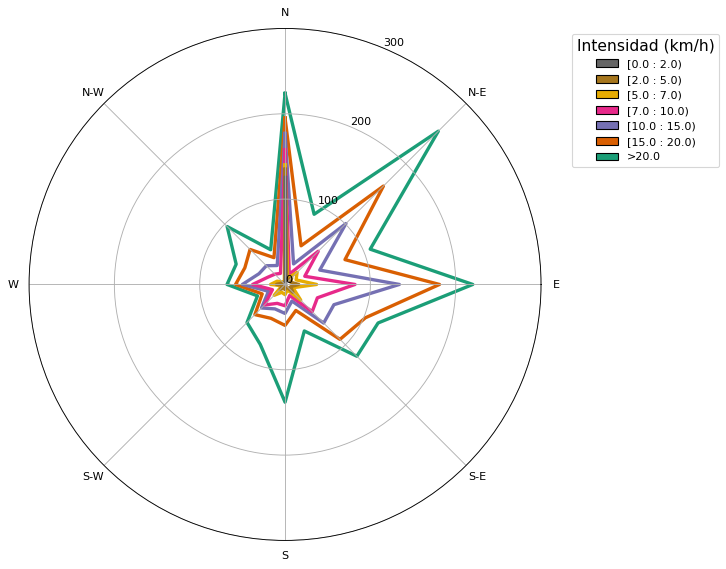

In [ ]:
ax = WindroseAxes.from_ax()
ax.contour(df_recortado4.DIRECCION, df_recortado4.INTENSIDAD, bins=[0,2,5,7,10,15,20],cmap =cm.Dark2_r , lw =3)
ax.set_yticks(np.arange(0, 400, step=100))
ax.set_yticklabels(np.arange(0, 400, step=100))
plt.legend(title= 'Intensidad (km/h)',title_fontsize='14', bbox_to_anchor=(1.05, 1.0), loc='upper left')